<a href="https://colab.research.google.com/github/Azimoj/CNN/blob/main/Week_11_Time_series_analysis_and_forecasts_with_Keras_on_Coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The pandemic analysis**

Analyze and compare the evolution of the pandemic globally and by continent.

What countries recorded the fastest infection growth? The slowest?

Did the number of infections accelerate or decrease concurrently to a season or a period of the year?

Share any other interesting insights you find relevant.


https://www.kaggle.com/code/deepakdeepu8978/covid-19-analysis-eda-forecasting#Modeling-



In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
pip install pandas pycountry pycountry-convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 8.6 MB/s eta 0:00:00


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import plotly.express as px

# to find continent of each country
import pycountry
import pycountry_convert as pc

import warnings
warnings.filterwarnings('ignore')


import plotly.graph_objects as go

In [ ]:
#plt.style.use('fivethirtyeight')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM #Dropout, GRU, Bidirectional
#from keras.optimizers import SGD
#import math
from sklearn.metrics import mean_squared_error

In [ ]:
# URL of the CSV file
url = "https://raw.githubusercontent.com/mansont/datasets-tests/main/covid19_confirmed_global.csv"

# Reading the CSV file with handling bad lines
df = pd.read_csv(url)
df

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
269            NaN             Vietnam  14.058324  108.277199        0   
270            NaN  West Bank and Gaza  31.952200   35.233200        0   
271            NaN               Yemen  15.552727   48.516388        0   
272            NaN              Zambia -13.133897   27.849332        0   
273            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/1/21  4/2/21  4/3/21  \
0          0        0        0        0        0  ...   56517   56572   56595   
1          0        0        0        0        0  ...  125506  125842  126183   
2          0        0        0        0        0  ...  117304  117429  117524   
3          0        0        0        0        0  ...   12053   12115   12174   
4          0        0        0        0        0  ...   22399   22467   22579   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
269        2        2        2        2        2  ...    2617    2620    2626   
270        0        0        0        0        0  ...  244645  246893  248482   
271        0        0        0        0        0  ...    4531    4620    4697   
272        0        0        0        0        0  ...   88549   88730   88800   
273        0        0        0        0        0  ...   36896   36903   36911   

     4/4/21  4/5/21  4/6/21  4/7/21  4/8/21  4/9/21  4/10/21  
0     56676   56717   56779   56873   56943   57019    57144  
1    126531  126795  126936  127192  127509  127795   128155  
2    117622  117739  117879  118004  118116  118251   118378  
3     12231   12286   12328   12363   12409   12456    12497  
4     22631   22717   22885   23010   23108   23242    23331  
..      ...     ...     ...     ...     ...     ...      ...  
269    2631    2637    2648    2659    2668    2683     2692  
270  251288  253922  256461  259133  262017  264395   265897  
271    4798    4881    4975    5047    5133    5233     5276  
272   88930   89009   89071   89386   89592   89783    89918  
273   36923   36934   36966   36984   37052   37147    37273  

[274 rows x 449 columns]

In [ ]:
df.rename(columns={'Country/Region':'Country'}, inplace=True)
df.rename(columns={'Province/State':'State'}, inplace=True)

In [ ]:
# Function to get the continent code from the country name
def country_to_continent(country_name):
    try:
        # Get the ISO-3166 Alpha-2 country code
        country_alpha2 = pycountry.countries.lookup(country_name).alpha_2
        # Get the continent code (e.g., AF for Africa, AS for Asia, etc.)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        # Return the full continent name
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except Exception as e:
        return None

# Apply the function to the country_name column
df['Continent'] = df['Country'].apply(country_to_continent)

df.head()

State      Country       Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0   NaN  Afghanistan  33.93911  67.709953        0        0        0        0   
1   NaN      Albania  41.15330  20.168300        0        0        0        0   
2   NaN      Algeria  28.03390   1.659600        0        0        0        0   
3   NaN      Andorra  42.50630   1.521800        0        0        0        0   
4   NaN       Angola -11.20270  17.873900        0        0        0        0   

   1/26/20  1/27/20  ...  4/2/21  4/3/21  4/4/21  4/5/21  4/6/21  4/7/21  \
0        0        0  ...   56572   56595   56676   56717   56779   56873   
1        0        0  ...  125842  126183  126531  126795  126936  127192   
2        0        0  ...  117429  117524  117622  117739  117879  118004   
3        0        0  ...   12115   12174   12231   12286   12328   12363   
4        0        0  ...   22467   22579   22631   22717   22885   23010   

   4/8/21  4/9/21  4/10/21  Continent  
0   56943   57019    57144       Asia  
1  127509  127795   128155     Europe  
2  118116  118251   118378     Africa  
3   12409   12456    12497     Europe  
4   23108   23242    23331     Africa  

[5 rows x 450 columns]

In [ ]:
# Use melt to transform the dataset
df_melted = pd.melt(df,
                    id_vars=['State', 'Country','Continent', 'Lat', 'Long'],
                    var_name='Date',
                    value_name='Confirmed')

# Display the transformed DataFrame
df_melted

State             Country Continent        Lat        Long     Date  \
0        NaN         Afghanistan      Asia  33.939110   67.709953  1/22/20   
1        NaN             Albania    Europe  41.153300   20.168300  1/22/20   
2        NaN             Algeria    Africa  28.033900    1.659600  1/22/20   
3        NaN             Andorra    Europe  42.506300    1.521800  1/22/20   
4        NaN              Angola    Africa -11.202700   17.873900  1/22/20   
...      ...                 ...       ...        ...         ...      ...   
121925   NaN             Vietnam      Asia  14.058324  108.277199  4/10/21   
121926   NaN  West Bank and Gaza      None  31.952200   35.233200  4/10/21   
121927   NaN               Yemen      Asia  15.552727   48.516388  4/10/21   
121928   NaN              Zambia    Africa -13.133897   27.849332  4/10/21   
121929   NaN            Zimbabwe    Africa -19.015438   29.154857  4/10/21   

        Confirmed  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
121925       2692  
121926     265897  
121927       5276  
121928      89918  
121929      37273  

[121930 rows x 7 columns]

In [ ]:
df_melted.isna().sum().sort_values(ascending = False)

State        84105
Continent     7120
Lat            445
Long           445
Country          0
Date             0
Confirmed        0
dtype: int64

In [ ]:
data = df_melted.copy()

In [ ]:
data.drop('State',axis=1, inplace= True)
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114365 entries, 0 to 121929
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Country    114365 non-null  object 
 1   Continent  114365 non-null  object 
 2   Lat        114365 non-null  float64
 3   Long       114365 non-null  float64
 4   Date       114365 non-null  object 
 5   Confirmed  114365 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 6.1+ MB


In [ ]:
# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
confirmed = data.groupby('Date').sum()['Confirmed'].reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))

# Update layout to change the size of the chart
fig.update_layout(width=800, height=600)

In [ ]:
# Assuming `data` is already defined and contains the necessary data
formated_gdf = data.groupby(['Date', 'Country'])['Confirmed'].max().reset_index()

# Convert the 'Date' column to datetime format and then to the specified string format
#formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date']).dt.strftime('%m/%d/%Y')

# Calculate the size for the bubbles in the scatter plot
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

# Create the scatter_geo plot
fig = px.scatter_geo(
    formated_gdf,
    locations="Country",
    locationmode='country names',
    color="Confirmed",
    size='size',
    hover_name="Country",
    range_color=[0, 100],
    projection="natural earth",
    animation_frame="Date",
    title='COVID-19: Confirmed Cases Over Time',
    color_continuous_scale="peach"
)

# Uncomment the following line if you want to hide the color scale
# fig.update(layout_coloraxis_showscale=False)

fig.show()


In [ ]:
# Assuming `data` is already defined and contains the necessary data
formated_gdf = data.groupby(['Date', 'Country'])['Confirmed'].max().reset_index()

# Convert the 'Date' column to datetime format and then to the specified string format
#formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date']).dt.strftime('%m/%d/%Y')

# Calculate the size for the bubbles in the scatter plot
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

# Create the scatter_geo plot
fig = px.choropleth(
    formated_gdf,
    locations="Country",
    locationmode='country names',
    color="Confirmed",

    hover_name="Country",
    range_color=[0, 100],
    projection="natural earth",
    animation_frame="Date",
    title='COVID-19: Confirmed Cases Over Time',
    color_continuous_scale="peach"
)

# Uncomment the following line if you want to hide the color scale
# fig.update(layout_coloraxis_showscale=False)

fig.show()

In [ ]:
# Aggregate confirmed cases by continent and date
continent_data = data.groupby(['Date', 'Continent']).agg({
    'Confirmed': 'sum',
    'Lat': 'mean',
    'Long': 'mean'
}).reset_index()

# Convert the 'Date' column to the specified string format
continent_data['Date'] = continent_data['Date'].dt.strftime('%m/%d/%Y')

print(continent_data)

# Create the map visualization
fig = px.scatter_geo(
    continent_data,
    lat="Lat",
    lon="Long",
    size="Confirmed",
    hover_name="Continent",
    hover_data={"Lat": False, "Long": False, "Confirmed": True},
    color="Confirmed",
    color_continuous_scale="peach",
    size_max=50,
    animation_frame="Date",
    projection="natural earth",
    title='COVID-19: Confirmed Cases Over Time by Continent'
)

fig.show()

            Date      Continent  Confirmed        Lat        Long
0     01/22/2020         Africa          0   2.869232   17.735631
1     01/22/2020           Asia        554  29.325111   89.824964
2     01/22/2020         Europe          0  35.256955   -5.245519
3     01/22/2020  North America          1  29.208208  -77.702267
4     01/22/2020        Oceania          0 -23.561940  130.263050
...          ...            ...        ...        ...         ...
2665  04/10/2021           Asia   26667583  29.325111   89.824964
2666  04/10/2021         Europe   36945893  35.256955   -5.245519
2667  04/10/2021  North America   35980623  29.208208  -77.702267
2668  04/10/2021        Oceania      40418 -23.561940  130.263050
2669  04/10/2021  South America   22384990 -12.652374  -64.493907

[2670 rows x 5 columns]


In [ ]:
total_cov_c = pd.DataFrame(data.groupby('Country')['Confirmed'].sum())
total_cov_c['Country'] = total_cov_c.index

# Convert confirmed cases to millions
total_cov_c['Confirmed_B'] = total_cov_c['Confirmed'] / 1_000_000_000
total_cov_c['Confirmed_Text'] = total_cov_c['Confirmed_B'].apply(lambda x: f'{x:.2f}B')

# Create the bar chart
fig = px.bar(
    total_cov_c.sort_values('Confirmed', ascending=False)[:20][::-1],
    x='Confirmed_B',
    y='Country',
    title='Confirmed Cases in each Country / Bilion',
    text='Confirmed_Text',
    height=900,  # Adjust height as needed
    width=1200,  # Add width parameter to adjust width as needed
    orientation='h'
)

fig.show()

In [ ]:
# Assume `df` is your DataFrame loaded with appropriate data
# Drop unnecessary columns
ts_country = data.drop(columns=['Lat', 'Long', 'Continent'])

# Ensure 'Date' column is in datetime format
ts_country['Date'] = pd.to_datetime(ts_country['Date'])

# Pivot the data to get countries as columns and dates as rows
ts_country = ts_country.pivot_table(values='Confirmed', index='Date', columns='Country', aggfunc='sum')

# Get countries with the most cases on the last date in DataFrame
ts_country = ts_country.loc[:, ts_country.iloc[-1].sort_values(ascending=False).head(7).index]

# Reset index for Plotly
ts_country = ts_country.reset_index()

# Melt the DataFrame for Plotly
ts_country = ts_country.melt(id_vars='Date', value_vars=ts_country.columns[1:], var_name='Country', value_name='Confirmed')

# Plot using Plotly Express
fig = px.line(ts_country, x='Date', y='Confirmed', color='Country', title='Time series of confirmed cases of countries with most confirmed cases')
# Update layout to change the size of the chart
fig.update_layout(width=800, height=600)

# Show plot
fig.show()


In [ ]:
# Assuming df_melted is already defined and contains the necessary data
total_cov_st = pd.DataFrame(df_melted.groupby('Continent')['Confirmed'].sum())
total_cov_st['Continent'] = total_cov_st.index

# Convert confirmed cases to millions
total_cov_st['Confirmed_B'] = total_cov_st['Confirmed'] / 1_000_000_000
total_cov_st['Confirmed_Text'] = total_cov_st['Confirmed_B'].apply(lambda x: f'{x:.2f}B')

# Create the bar chart
fig = px.bar(
    total_cov_st.sort_values('Confirmed', ascending=False)[::-1],
    x='Confirmed_B',
    y='Continent',
    title='Confirmed Cases in each Continent / Bilion',
    text='Confirmed_Text',
    height=600,  # Adjust height as needed
    width=1000,  # Add width parameter to adjust width as needed
    orientation='h'
)

fig.show()


In [ ]:
# Ensure the data is sorted by Country and Date
df_fast = data.sort_values(by=['Country', 'Date'])

# Calculate the daily increase in confirmed cases
df_fast['Daily Increase'] = df_fast.groupby('Country')['Confirmed'].diff()

# Calculate the average daily increase for each country
average_daily_increase = df_fast.groupby('Country')['Daily Increase'].mean().reset_index()

# Sort by average daily increase in descending order to find the fastest growth
fastest_growth_countries = average_daily_increase.sort_values(by='Daily Increase', ascending=False)

fastest_growth_countries


Country  Daily Increase
163                US    70161.022523
23             Brazil    30281.545045
72              India    30087.398649
78              Italy     8455.128378
150             Spain     7539.441441
..                ...             ...
146   Solomon Islands        0.042793
30             Canada        0.011088
101  Marshall Islands        0.009009
170           Vanuatu        0.006757
135             Samoa        0.006757

[176 rows x 2 columns]

In [ ]:
#df['NonCumulative'] = df.groupby('Country/Region')['Value'].diff().fillna(df['Value']) #jin

In [ ]:
# Create the bar chart
fig = px.bar( fastest_growth_countries.sort_values('Daily Increase', ascending=False)[:20],
    x='Country',
    y='Daily Increase',
    title='Fastest Infection Growth Rates by Country')

fig.show()

In [ ]:
# Create the bar chart
fig = px.bar( fastest_growth_countries.sort_values('Daily Increase', ascending=True)[:20],
    x='Country',
    y='Daily Increase',
    title='Slowest Infection Growth Rates by Country')
fig.show()

In [ ]:
data = data.sort_values(by=['Country', 'Date'])
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data['Season'] = data['Date'].apply(get_season)

In [ ]:
# Calculate the daily increase in confirmed cases
data['Daily Increase'] = data.groupby('Country')['Confirmed'].diff()

# Aggregate the data to get the average daily increase by season
seasonal_growth = data.groupby(['Country', 'Season'])['Daily Increase'].mean().reset_index()

# Print the seasonal growth data
print(seasonal_growth)

         Country  Season  Daily Increase
0    Afghanistan    Fall       89.175824
1    Afghanistan  Spring      125.090226
2    Afghanistan  Summer      249.467391
3    Afghanistan  Winter       73.757812
4        Albania    Fall      315.043956
..           ...     ...             ...
699       Zambia  Winter      475.679688
700     Zimbabwe    Fall       37.945055
701     Zimbabwe  Spring       10.240602
702     Zimbabwe  Summer       68.684783
703     Zimbabwe  Winter      204.210938

[704 rows x 3 columns]


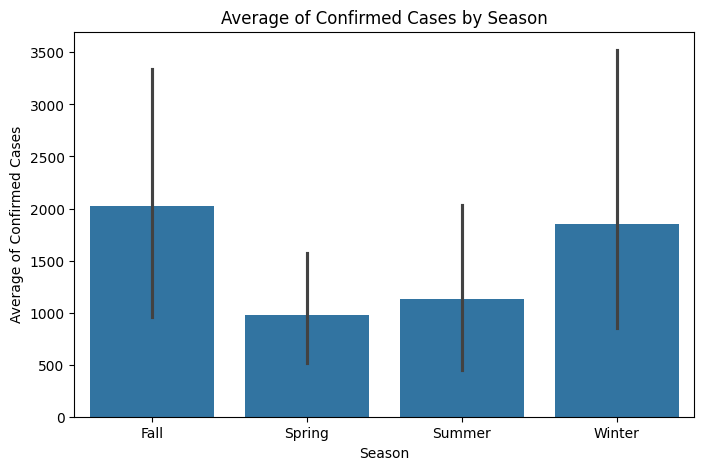

In [ ]:
# Visualize the results
plt.figure(figsize=(8, 5))
sns.barplot(x='Season', y='Daily Increase', data=seasonal_growth)
plt.title('Average of Confirmed Cases by Season')
plt.xlabel('Season')
plt.ylabel('Average of Confirmed Cases')
plt.show()

### **Forecasts**

Train an RNN or LSTM model to forecast infections from April 10 to May 31. Try to find the best hyperparameters for your model.

Bonus : Compare your results to another model like Prophet.

https://facebook.github.io/prophet/

In [ ]:
# keep columns that are needed
df_ml = data[['Date','Confirmed']]


#df_ml['Date'] = df_ml['Date'].dt.strftime('%Y-%m-%d')
# Sum the values globally
global_data = df_ml.groupby('Date')['Confirmed'].sum()

# Convert the index to datetime
global_data.index = pd.to_datetime(global_data.index)

# Display the first few rows to verify
global_data.head()

Date
2020-01-22     555
2020-01-23     653
2020-01-24     936
2020-01-25    1428
2020-01-26    2111
Name: Confirmed, dtype: int64

In [ ]:
# Redefine train and test date ranges
train_end_date = '2021-03-31'
test_start_date = '2021-04-01'
test_end_date = '2021-04-10'

# Correctly split the data
train_data = global_data[:train_end_date]
test_data = global_data[test_start_date:test_end_date]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_scaled = scaler.fit_transform(test_data.values.reshape(-1, 1))

In [ ]:
confirmed_cases = df_ml['Confirmed'].values
confirmed_cases

array([    0,     0,     0, ..., 51035,   147, 37273])

In [ ]:
# Extract dates and confirmed cases
dates = df_country['Date']
confirmed_cases = df_country['Confirmed'].values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
confirmed_cases_scaled = scaler.fit_transform(confirmed_cases.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
SEQUENCE_LENGTH = 14  # Example: Use data from previous 14 days to predict the next day

# Create sequences
X, y = create_sequences(confirmed_cases_scaled, SEQUENCE_LENGTH)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(units=50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

# Make predictions for the next 30 days
future_steps = 30
future_input = confirmed_cases_scaled[-SEQUENCE_LENGTH:]

predictions = []
for i in range(future_steps):
    future_input = future_input.reshape(1, SEQUENCE_LENGTH, 1)
    pred = model.predict(future_input)[0, 0]
    predictions.append(pred)
    future_input = np.append(future_input[0][1:], pred).reshape(SEQUENCE_LENGTH, 1)

# Inverse transform predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot the actual and predicted values
plt.figure(figsize=(14, 7))
plt.plot(dates, confirmed_cases, label='Actual Confirmed Cases')
future_dates = pd.date_range(dates.iloc[-1], periods=future_steps + 1, closed='right')
plt.plot(future_dates, predictions, label='Predicted Confirmed Cases', linestyle='--', color='red')
plt.title('COVID-19 Confirmed Cases Prediction')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Prepare the data for RNN/LSTM
def create_dataset(dataset, look_back):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 14
X_train, Y_train = create_dataset(train_scaled, look_back)

In [ ]:
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [ ]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define the LSTM model
def create_model(look_back=14, units=50, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units, input_shape=(look_back, 1)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create the model
model = create_model(look_back, units=50, learning_rate=0.001)

# Train the model and track the history
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
14/14 [==============================] - 3s 8ms/step - loss: 0.0917
Epoch 2/50
14/14 [==============================] - 0s 8ms/step - loss: 0.0118
Epoch 3/50
14/14 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 4/50
14/14 [==============================] - 0s 7ms/step - loss: 6.4619e-04
Epoch 5/50
14/14 [==============================] - 0s 7ms/step - loss: 3.3989e-04
Epoch 6/50
14/14 [==============================] - 0s 8ms/step - loss: 2.1240e-04
Epoch 7/50
14/14 [==============================] - 0s 7ms/step - loss: 1.6908e-04
Epoch 8/50
14/14 [==============================] - 0s 8ms/step - loss: 1.4085e-04
Epoch 9/50
14/14 [==============================] - 0s 10ms/step - loss: 1.1600e-04
Epoch 10/50
14/14 [==============================] - 0s 7ms/step - loss: 9.7935e-05
Epoch 11/50
14/14 [==============================] - 0s 7ms/step - loss: 8.0986e-05
Epoch 12/50
14/14 [==============================] - 0s 8ms/step - loss: 6.9512e-05
Epoch 13/50


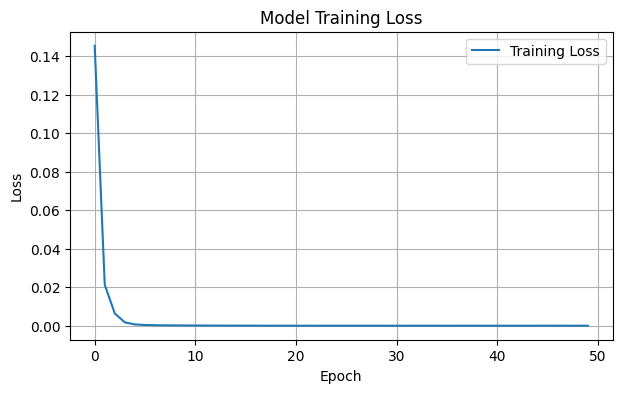

In [ ]:
# Plot training loss
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create sequences for the test data
X_test, Y_test = create_dataset(np.concatenate((train_scaled[-look_back:], test_scaled)), look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predictions_scaled = model.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled)

# Calculate metrics
mse = mean_squared_error(Y_test, predictions)
#mae = mean_absolute_error(Y_test, predictions)

print(f'Mean Squared Error: {mse}')
#print(f'Mean Absolute Error: {mae}')

1/1 [==============================] - 0s 460ms/step
Mean Squared Error: 1.564217894518489e+16


In [ ]:
# Create a DataFrame with the prediction results
prediction_dates = pd.date_range(start=test_start_date, periods=len(predictions))
prediction_df = pd.DataFrame(data=predictions, index=prediction_dates, columns=['Predicted'])
test_df = pd.DataFrame(data=scaler.inverse_transform(Y_test.reshape(-1, 1)), index=prediction_dates, columns=['True'])

In [ ]:
# Define the number of future steps you want to predict
future_steps = 51

# Initialize the input sequence with the last look_back values from the training data
input_sequence = train_scaled[-look_back:].reshape(1, look_back, 1)

# Initialize a list to store the predictions
future_predictions = []

# Generate future predictions
for _ in range(future_steps):
    # Predict the next value
    next_value_scaled = model.predict(input_sequence)

    # Append the predicted value to the list
    future_predictions.append(next_value_scaled[0, 0])

    # Update the input sequence by appending the predicted value and removing the first value
    next_value_scaled_reshaped = np.reshape(next_value_scaled[0, 0], (1, 1, 1))
    input_sequence = np.append(input_sequence[:, 1:, :], next_value_scaled_reshaped, axis=1)

# Inverse transform the future predictions to get the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a DataFrame with the future prediction results
last_date = test_df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps, freq='D')
future_prediction_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted'])

# Combine true values, predicted values, and future predictions into one DataFrame
combined_df = pd.concat([test_df, prediction_df, future_prediction_df], axis=0)

# Display the combined DataFrame
print(combined_df)

1/1 [==============================] - 0s 22ms/step
                   True    Predicted
2021-04-01  121080009.0          NaN
2021-04-02  121654626.0          NaN
2021-04-03  122132600.0          NaN
2021-04-04  122631205.0          NaN
2021-04-05  123066528.0          NaN
...                 ...          ...
2021-05-27          NaN  126448672.0
2021-05-28          NaN  126450864.0
2021-05-29          NaN  126452992.0
2021-05-30          NaN  126455064.0
2021-05-31          NaN  126457080.0

[71 rows x 2 columns]


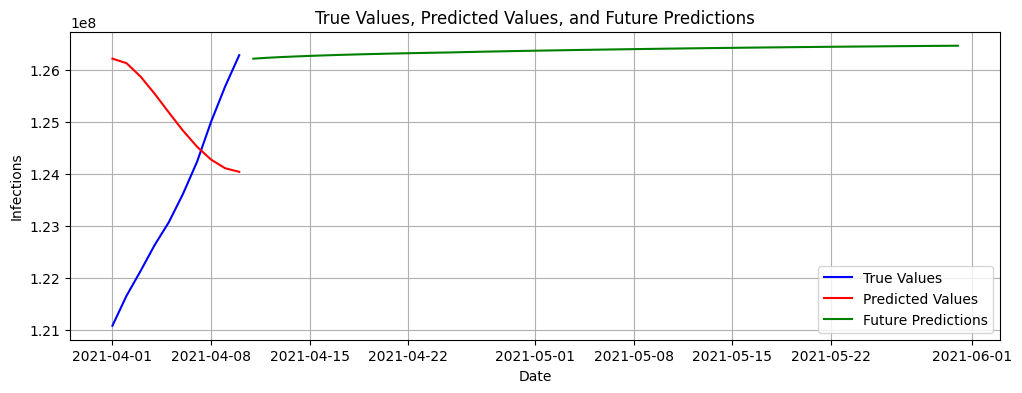

In [ ]:
# Plot true vs. predicted values on the test data
plt.figure(figsize=(12, 4))
plt.plot(test_df.index, test_df['True'], label='True Values', color='blue')
plt.plot(prediction_df.index, prediction_df['Predicted'], label='Predicted Values', color='red')
plt.plot(future_prediction_df.index, future_prediction_df['Predicted'], label='Future Predictions', color='green')
plt.title('True Values, Predicted Values, and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Infections')
plt.legend()
plt.grid(True)
plt.show()

## **custom_loss**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K

In [ ]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define the LSTM model
def create_model(look_back=14, units=50, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units, input_shape=(look_back, 1)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [ ]:
def custom_loss(y_true, y_pred):
    return K.mean(K.square(K.maximum(0.0, y_true - y_pred)))


def create_model(look_back=14, units=50, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units, input_shape=(look_back, 1)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss=custom_loss, optimizer=optimizer)
    return model

model = create_model(look_back, units=50, learning_rate=0.001)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/100
11/11 [==============================] - 3s 68ms/step - loss: 0.0619 - val_loss: 0.2633
Epoch 2/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0069 - val_loss: 0.0000e+00
Epoch 3/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100
11/11 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/100
11/11 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/100
11/11 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/100
11/11 [====================

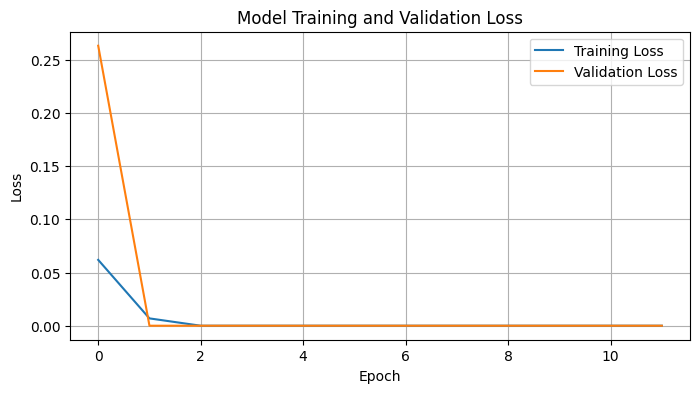

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_test, Y_test = create_dataset(np.concatenate((train_scaled[-look_back:], test_scaled)), look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predictions_scaled = model.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled)

mse = mean_squared_error(test_data, predictions)
#mae = mean_absolute_error(test_data, predictions)

print(f'Mean Squared Error: {mse}')
#print(f'Mean Absolute Error: {mae}')

1/1 [==============================] - 1s 888ms/step
Mean Squared Error: 9545613922271.4


In [ ]:
prediction_dates = pd.date_range(start=test_start_date, periods=len(predictions))
prediction_df = pd.DataFrame(data=predictions, index=prediction_dates, columns=['Predicted'])
test_df = pd.DataFrame(data=test_data.values, index=prediction_dates, columns=['True'])

future_steps = 30

input_sequence = train_scaled[-look_back:].reshape(1, look_back, 1)

future_predictions = []

for _ in range(future_steps):
    next_value_scaled = model.predict(input_sequence)

    if len(future_predictions) > 0 and next_value_scaled[0, 0] < future_predictions[-1]:
        next_value_scaled[0, 0] = future_predictions[-1]

    future_predictions.append(next_value_scaled[0, 0])

    next_value_scaled_reshaped = np.reshape(next_value_scaled[0, 0], (1, 1, 1))
    input_sequence = np.append(input_sequence[:, 1:, :], next_value_scaled_reshaped, axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

last_date = test_df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps, freq='D')
future_prediction_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted'])

combined_df = pd.concat([test_df, prediction_df, future_prediction_df], axis=0)

print(combined_df)

1/1 [==============================] - 0s 21ms/step
                   True    Predicted
2021-04-01  121080009.0          NaN
2021-04-02  121654626.0          NaN
2021-04-03  122132600.0          NaN
2021-04-04  122631205.0          NaN
2021-04-05  123066528.0          NaN
2021-04-06  123607308.0          NaN
2021-04-07  124224612.0          NaN
2021-04-08  124995374.0          NaN
2021-04-09  125675290.0          NaN
2021-04-10  126276306.0          NaN
2021-04-01          NaN  126459656.0
2021-04-02          NaN  126457056.0
2021-04-03          NaN  126274192.0
2021-04-04          NaN  125996952.0
2021-04-05          NaN  125674648.0
2021-04-06          NaN  125346472.0
2021-04-07          NaN  125040576.0
2021-04-08          NaN  124780784.0
2021-04-09          NaN  124586416.0
2021-04-10          NaN  124474448.0
2021-04-11          NaN  126459656.0
2021-04-12          NaN  126477368.0
2021-04-13          NaN  126500864.0
2021-04-14          NaN  126527888.0
2021-04-15          NaN

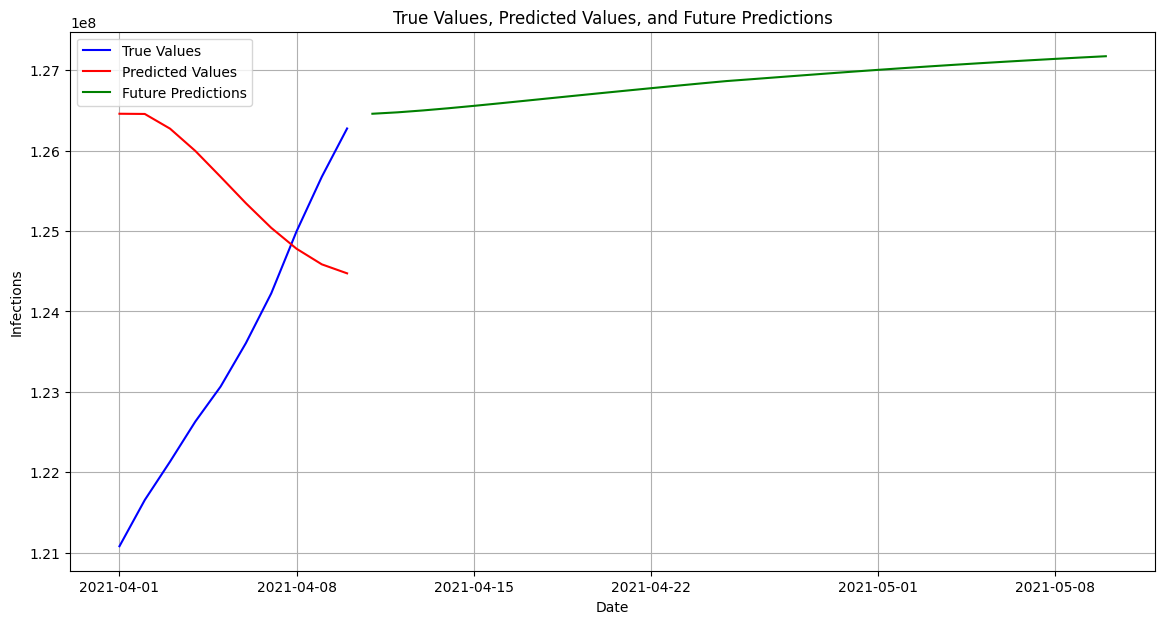

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(test_df.index, test_df['True'], label='True Values', color='blue')
plt.plot(prediction_df.index, prediction_df['Predicted'], label='Predicted Values', color='red')
plt.plot(future_prediction_df.index, future_prediction_df['Predicted'], label='Future Predictions', color='green')
plt.title('True Values, Predicted Values, and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Infections')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model = Sequential(name="LSTM-Model") # Model
model.add(Input(shape=(X_train.shape[1],X_train.shape[2]), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Bidirectional(LSTM(units=32, activation='tanh', recurrent_activation='sigmoid', stateful=False), name='Hidden-LSTM-Encoder-Layer')) # Encoder Layer
model.add(RepeatVector(Y_train.shape[1], name='Repeat-Vector-Layer')) # Repeat Vector
model.add(Bidirectional(LSTM(units=32, activation='tanh', recurrent_activation='sigmoid', stateful=False, return_sequences=True), name='Hidden-LSTM-Decoder-Layer')) # Decoder Layer
model.add(TimeDistributed(Dense(units=1, activation='linear'), name='Output-Layer')) # Output Layer, Linear(x) = x


In [ ]:
# Extract dates and confirmed cases
dates = df_ml['Date']
confirmed_cases = df_ml['Confirmed'].values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
confirmed_cases_scaled = scaler.fit_transform(confirmed_cases.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
SEQUENCE_LENGTH = 14  # Example: Use data from previous 14 days to predict the next day

# Create sequences
X, y = create_sequences(confirmed_cases_scaled, SEQUENCE_LENGTH)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(units=50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
3574/3574 [==============================] - 64s 17ms/step - loss: 0.0012
Epoch 2/50
3574/3574 [==============================] - 64s 18ms/step - loss: 0.0012
Epoch 3/50
3574/3574 [==============================] - 63s 18ms/step - loss: 0.0012
Epoch 4/50
3574/3574 [==============================] - 69s 19ms/step - loss: 0.0012
Epoch 5/50
3574/3574 [==============================] - 60s 17ms/step - loss: 0.0012
Epoch 6/50
3574/3574 [==============================] - 62s 17ms/step - loss: 0.0012
Epoch 7/50
3574/3574 [==============================] - 62s 17ms/step - loss: 0.0012
Epoch 8/50
3574/3574 [==============================] - 60s 17ms/step - loss: 0.0012
Epoch 9/50
3574/3574 [==============================] - 60s 17ms/step - loss: 0.0012
Epoch 10/50
3574/3574 [==============================] - 59s 17ms/step - loss: 0.0011
Epoch 11/50
3574/3574 [==============================] - 64s 18ms/step - loss: 0.0012
Epoch 12/50
3574/3574 [==============================] - 60s 17

KeyboardInterrupt: 

In [ ]:
#split a univariate sequence into samples
def split_sequence(sequence,n_steps):
    X,y = list(),list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_idx = i+n_steps
        # Check if we are beyond the sequence
        if end_idx  > len(sequence)-1:
            break
        # gather i/o parts of the pattern
        seq_x,seq_y = sequence[i:end_idx],sequence[end_idx]
        X.append(seq_x)
        y.append(seq_y)

    return array(X),array(y)

In [ ]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(df_ml, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

KeyError: 3

In [ ]:
# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length, 2].values)  # Use 'ConfirmedScaled' column
        y.append(data.iloc[i+seq_length, 2])           # Predict the next value
    return np.array(X), np.array(y)

# Define sequence length
n_steps = 7  # Example: Use data from previous 7 days to predict the next day

# Create sequences
X, y = create_sequences(data, n_steps)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
X.shape,y.shape

((114358, 7, 1), (114358,))

In [ ]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
3574/3574 [==============================] - 36s 9ms/step - loss: 430.0070
Epoch 2/50
3574/3574 [==============================] - 30s 8ms/step - loss: 119.8813
Epoch 3/50
3574/3574 [==============================] - 24s 7ms/step - loss: 41.0422
Epoch 4/50
3574/3574 [==============================] - 23s 7ms/step - loss: 11.7182
Epoch 5/50
3574/3574 [==============================] - 23s 7ms/step - loss: 4.5229
Epoch 6/50
3574/3574 [==============================] - 25s 7ms/step - loss: 2.4737
Epoch 7/50
3574/3574 [==============================] - 24s 7ms/step - loss: 1.2203
Epoch 8/50
3574/3574 [==============================] - 24s 7ms/step - loss: 0.8218
Epoch 9/50
3574/3574 [==============================] - 23s 7ms/step - loss: 0.4134
Epoch 10/50
3574/3574 [==============================] - 28s 8ms/step - loss: 1.6384
Epoch 11/50
3574/3574 [==============================] - 23s 6ms/step - loss: 0.1511
Epoch 12/50
3574/3574 [==============================] - 25s 7ms/ste

In [ ]:
future_steps = 51  # Number of days to predict
future_input = df_model['ConfirmedScaled'].values[-SEQUENCE_LENGTH:].reshape(1, -1, 1)

predictions = []
for i in range(future_steps):
    pred = model.predict(future_input)[0, 0]
    predictions.append(pred)
    future_input = np.roll(future_input, -1)
    future_input[0, -1] = pred

# Inverse transform predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

1/1 [==============================] - 0s 22ms/step


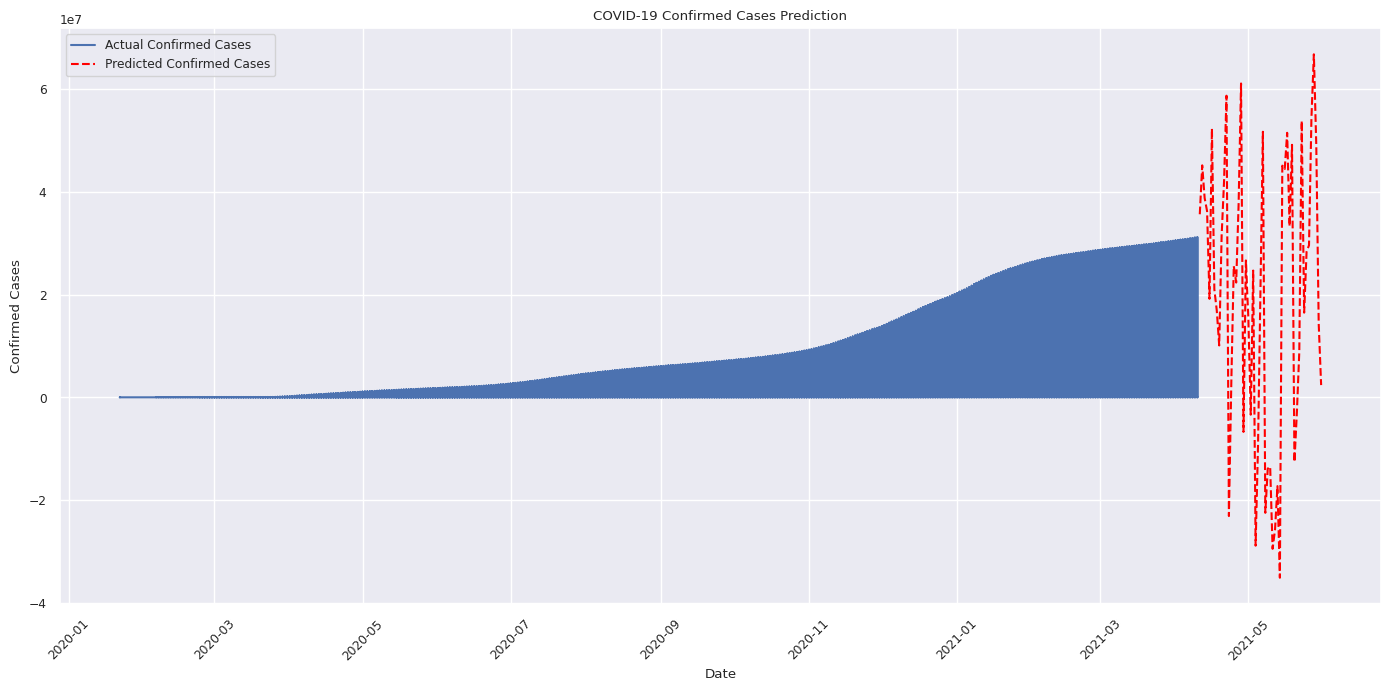

In [ ]:
# Plot actual data and predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Confirmed'], label='Actual Confirmed Cases')
plt.plot(data['Date'].iloc[-1] + pd.to_timedelta(np.arange(1, future_steps + 1), 'D'), predictions, label='Predicted Confirmed Cases', linestyle='--', color='red')
plt.title('COVID-19 Confirmed Cases Prediction')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Prophet**
A procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. It is also an open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

https://stackoverflow.com/questions/73680296/modulenotfounderror-no-module-named-prophet-in-jupyter-notebook


https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
confirmed = data.groupby('Date').sum()['Confirmed'].reset_index()

In [ ]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
confirmed.ds.max()

Timestamp('2021-04-10 00:00:00')

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=51)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplc56_sba/ce9an48r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplc56_sba/50f6gmxi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19175', 'data', 'file=/tmp/tmplc56_sba/ce9an48r.json', 'init=/tmp/tmplc56_sba/50f6gmxi.json', 'output', 'file=/tmp/tmplc56_sba/prophet_modelcvg_huvw/prophet_model-20240614110150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:01:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds
491 2021-05-27
492 2021-05-28
493 2021-05-29
494 2021-05-30
495 2021-05-31

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
491 2021-05-27  1.449540e+08  1.393793e+08  1.506664e+08
492 2021-05-28  1.454195e+08  1.396242e+08  1.512200e+08
493 2021-05-29  1.458527e+08  1.399468e+08  1.519639e+08
494 2021-05-30  1.462145e+08  1.402714e+08  1.523431e+08
495 2021-05-31  1.466021e+08  1.405127e+08  1.529057e+08

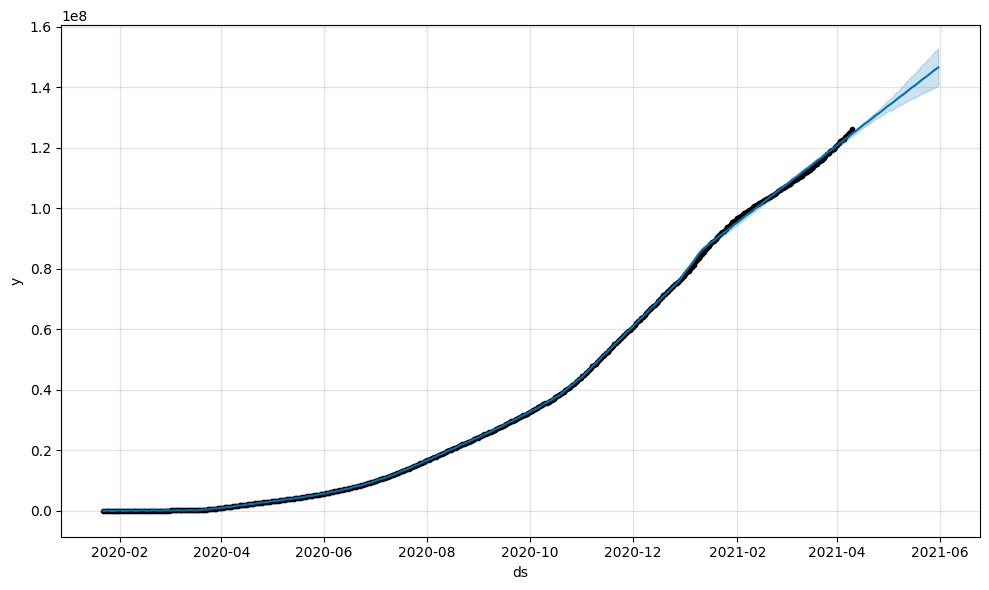

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

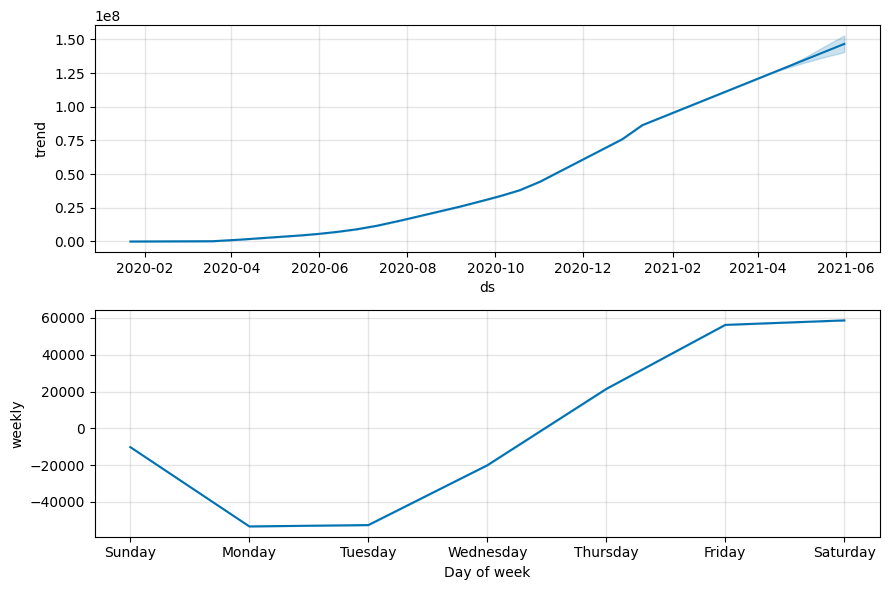

In [ ]:
forecast_components = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)